# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## 1. Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business problem is the identification of what consumers value in a used car; that is, what features make a car more or less expensive. To solve this problem, we have a set of data containing the vehicle attributes of 426,880 used cars, as well as the sale price of those cars. 

The business problem is not a prediction problem, rather it is an inference prolem, where we need to draw inferences from the data to advise the used car dealers. However in order to answer this inference problem, first we need to use the data to develop a model of how vehcile sale prices are related to their attributes. So the data problem to be solved is the construction of a linear regression model that can predict the sale price of a used car from the input features. Once we have constructed our best model, then we will solve the business problem by looking at the size and magnitude of the coefficients of each of the standardized input features, to draw inferences from the model that can be used to inform the client about what factors are valued most by consumers.

## 2. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

First, we will take a look at the general characteristics of the data:
- Number of rows and columns (fields)
- Inspection of a small subset of rows
- Data types of fields
- Missing values for each field

Then we'll take a closer look at each field, to determine which should be kept and which should be discared.

For each field with numerical data, we will look at:
- Number of missing values
- Range of data, incluidng outliers to be excluded
- Whether the data needs to be transformed in some way

For each field with categorical data, we will look at:
- Missing values
- How many categories are present
- The counts in each category

As we inspect these fields, we will decide which ones will need to be dropped, either because:
- They don't contribute any useful information, or
- There are too many separate categories for that field to build a reasonable model

We'll also decide what to do with missing values that remain, either:
- Dropping rows with missing values, or
- Substituting valid entries 

### 2.1 General Inspection
Let's start by importing the vehicle data into a Pandas DataFrame and doing a general inspection of the data:

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing   import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error

In [2]:
dfVehicleRaw = pd.read_csv('data/vehicles.csv')
dfVehicleRaw.shape

(426880, 18)

In [3]:
dfVehicleRaw.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


It looks like the data begins with entries that contain only region, state, and price, and no other data.
Let's try looking a little deeper in the DataFrame for valid data:

In [4]:
dfVehicleRaw[100:104]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
100,7309192232,auburn,16590,2015.0,hyundai,sonata sport sedan 4d,good,NaN,gas,26655.0,clean,other,5NPE34AF8FH021634,fwd,NaN,sedan,white,al
101,7309160821,auburn,12990,1968.0,volvo,NaN,NaN,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al
102,7308779719,auburn,33990,2017.0,ram,1500 crew cab tradesman,good,8 cylinders,gas,17033.0,clean,other,3C6RR7KT7HG794054,4wd,NaN,pickup,blue,al
103,7308779686,auburn,36590,2019.0,gmc,sierra 1500 limited double,good,8 cylinders,gas,14222.0,clean,other,2GTV2LECXK1123316,4wd,NaN,pickup,blue,al


That's more like it. Now let's look at the column names and data types:

In [5]:
dfVehicleRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Let's also look at the number of missing values as percentages:

In [6]:
print("Percent missing values:")
print(100 * (dfVehicleRaw.isnull().sum() / len(dfVehicleRaw)))

Percent missing values:
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


These percentages will be referenced repeatedly in the work below.

### 2.2 Numerical Fields
Now let's look at the data column by column, starting with the four numerical fields.

#### 2.2.1 Column 0 - id
Column 0 contains what should be a unique ID for each entry (row). Let's check to make sure there are no duplicates:

In [7]:
print("Number of duplicate IDs:", dfVehicleRaw['id'].duplicated().sum())

Number of duplicate IDs: 0


There don't appear to be any duplicate ID's. We'll drop this field when we begin preparing the data, because the DataFrame has its own index.

#### 2.2.2 Column 2 - price
Column 2, "price", will become the dependent variable to be predicted. We know from our general inspection above that there are no missing values in this field.

Let's look at the distribution and check for outliers:

In [8]:
priceQuartiles = dfVehicleRaw['price'].describe()
print("Quartiles for price field:")
print(f"Min: ${priceQuartiles['min']:,.2f}")
print(f"25%: ${priceQuartiles['25%']:,.2f}")
print(f"50%: ${priceQuartiles['50%']:,.2f}")
print(f"75%: ${priceQuartiles['75%']:,.2f}")
print(f"Max: ${priceQuartiles['max']:,.2f}")

Quartiles for price field:
Min: $0.00
25%: $5,900.00
50%: $13,950.00
75%: $26,485.75
Max: $3,736,928,711.00


We obviously have a problem with outliers in the price field, so we'll need to set lower and upper limits for the price data that we keep. I'll use the interquartile range method to set an upper limit of Q3 + (1.5 * IQR), but for the lower limit the interquartile range method produces a limit below zero. Vehicle prices that are zero or very low are likely to be erroneous, so for the lower limit I'll just use common sense and set it to $500 (inclusive).

So the limits we'll use during the Data Preparation phase are as follows:

In [9]:
priceLowerLimit = 500
priceUpperLimit = priceQuartiles['75%'] + 1.5 * (priceQuartiles['75%'] - priceQuartiles['25%'])
print(f"Lower Limit on price = ${priceLowerLimit:,.2f}")
print(f"Upper Limit on price = ${priceUpperLimit:,.2f}")

Lower Limit on price = $500.00
Upper Limit on price = $57,364.38


Let's see how much data this will exclude:

In [10]:
print(f"Rows excluded for price too low  = {100 * (dfVehicleRaw['price'] < priceLowerLimit).sum() / len(dfVehicleRaw):,.2f}%")
print(f"Rows excluded for price too high = {100 * (dfVehicleRaw['price'] > priceUpperLimit).sum() / len(dfVehicleRaw):,.2f}%")

Rows excluded for price too low  = 9.86%
Rows excluded for price too high = 1.92%


That's an acceptable loss of data in order to preserve the integrity of the model.

Note that the upper limit we'll use creates a limitation for the model, namely, that it will not perform well in the prediction of high priced used vehicles. This is an example of a modification to the business understanding that comes during the Data Understanding phase.

This field will be transformed logarithmically, to reflect the diminishing returns per dollar spent that one gets as cars become more expensive.

#### 2.2.3 Column 3 - year
The model year is encoded as a float. Let's look at the distribution and make sure everything looks okay:

In [11]:
yearQuartiles = dfVehicleRaw['year'].describe()
print("Quartiles for year field:")
print(f"Min: {yearQuartiles['min']:.0f}")
print(f"25%: {yearQuartiles['25%']:.0f}")
print(f"50%: {yearQuartiles['50%']:.0f}")
print(f"75%: {yearQuartiles['75%']:.0f}")
print(f"Max: {yearQuartiles['max']:.0f}")

Quartiles for year field:
Min: 1900
25%: 2008
50%: 2013
75%: 2017
Max: 2022


The max year of 2022 looks okay, but the min year of 1900 is suspicious. Let's take a closer look at the oldest vehicles, by printing some sample vehicle years, makes, and models from among the 200 oldest vehicles:

In [12]:
dfVehicleSortedByYear = dfVehicleRaw.sort_values(by = 'year')
for i in range(0, 200, 20):
    print(dfVehicleSortedByYear[i:i+1][['year', 'manufacturer', 'model']])

         year manufacturer        model
96564  1900.0         ford  power wagon
          year manufacturer     model
153388  1903.0    chevrolet  corvette
          year manufacturer  model
212049  1921.0          NaN  white
          year manufacturer     model
188939  1923.0         ford  t bucket
          year manufacturer     model
265454  1923.0         ford  t-bucket
         year manufacturer    model
58249  1926.0         ford  model t
         year manufacturer  model
13010  1927.0    chevrolet  coupe
          year manufacturer    model
176124  1927.0         ford  model t
          year manufacturer           model
288431  1928.0         ford  model a st.rod
          year manufacturer model
419802  1928.0         ford   NaN


Some of the data with the very oldest model years are obviously bad (e.g. there was no 1903 Chevy Corvette), but starting in the 1920's some of the data looks valid (e.g. the early Ford Model T's). This brings up the issue of whether to include classic cars in the training data, given that these cars will appreciate in value as they get older, unlike most used cars. Given this complication, for this model we will exclude classic cars from the training data, and revise our business understanding to include the fact that we are not attempting to predict the price of classic cars.

Classic cars are defined to be those that are at least 20 years old, among other things, so we will subtract 19 from the maximum age of 2022 to produce the earliest acceptable year, and exlude all cars where year is less than that. This results in the following limits (limits for this project are all defined as inclusive, not exclusive):

In [13]:
yearLowerLimit = yearQuartiles['max'] - 19
yearUpperLimit = yearQuartiles['max']
print(f"Lower Limit on year = {yearLowerLimit:.0f}")
print(f"Upper Limit on year = {yearUpperLimit:.0f}")

Lower Limit on year = 2003
Upper Limit on year = 2022


Let's see how much data this will exclude:

In [14]:
print(f"Rows excluded for year too early = {100 * (dfVehicleRaw['year'] < yearLowerLimit).sum() / len(dfVehicleRaw):,.2f}%")
print(f"Rows excluded for year too late  = {100 * (dfVehicleRaw['year'] > yearUpperLimit).sum() / len(dfVehicleRaw):,.2f}%")

Rows excluded for year too early = 9.10%
Rows excluded for year too late  = 0.00%


That's a fair amount of data to exclude, but it's necessary in order to create an effective model for prediction. This number does not include data with no value for model year (0.28% as noted above), which will also be exluded during the Data Preparation phase.

Model year will be valuable for price prediction, so we'll keep this field, and transform it to reflect the age of the vehicle rather than the numerical year. The age will then be transformed logarithmically, given that as cars get older, the depreciation per year goes down.

#### 2.2.4 Column 9 - odometer
Let's look at the distribution of odometer readings:

In [15]:
odometerQuartiles = dfVehicleRaw['odometer'].describe()
print("Quartiles for odometer field:")
print(f"Min: {odometerQuartiles['min']:.0f}")
print(f"25%: {odometerQuartiles['25%']:.0f}")
print(f"50%: {odometerQuartiles['50%']:.0f}")
print(f"75%: {odometerQuartiles['75%']:.0f}")
print(f"Max: {odometerQuartiles['max']:.0f}")

Quartiles for odometer field:
Min: 0
25%: 37704
50%: 85548
75%: 133542
Max: 10000000


We'll need to use the same approach as for the price field, using a standard 1.5 multiple of the IQR to exclude outliers on the high end, and common sense to produce a limit on the lower end. Even new vehicles usually have a few thousand miles on them due to driving to the dealership and/or test drives, so odometer readings that are zero or very low are likely to be erroneous and should be excluded. I'll use 5,000 miles as the lower limit. This gives us the following:

In [16]:
odometerLowerLimit = 5000
odometerUpperLimit = odometerQuartiles['75%'] + 1.5 * (odometerQuartiles['75%'] - odometerQuartiles['25%'])
print(f"Lower Limit on odometer = {odometerLowerLimit:,.0f}")
print(f"Upper Limit on odometer = {odometerUpperLimit:,.0f}")

Lower Limit on odometer = 5,000
Upper Limit on odometer = 277,300


Let's see how much data this will exclude:

In [17]:
print(f"Rows excluded for odometer too low  = {100 * (dfVehicleRaw['odometer'] < odometerLowerLimit).sum() / len(dfVehicleRaw):,.2f}%")
print(f"Rows excluded for odometer too high = {100 * (dfVehicleRaw['odometer'] > odometerUpperLimit).sum() / len(dfVehicleRaw):,.2f}%")

Rows excluded for odometer too low  = 4.35%
Rows excluded for odometer too high = 1.03%


This seems acceptable.

Like model year, odometer reading will be a valuable field for prediction, so this field will be kept during Data Preparation, subject to the limits just defined. The 1.03% of rows with missing values in this field will also be excluded.

Theis field will be transformed logarithmically, given that as cars get older, the depreciation per mile driven goes down.

### 2.3 Categorical Fields
Categorical fields can be handled in one of two ways, either with one-hot encoding to create a dummy feature for each category, or if the categories have a natural ordering or ranking, with ordinal encoding to substitute an ordered value for each category.

There are 14 categorical fields in the database. Let's begin by looking at the number of distinct categories for each field:

In [18]:
counts = {}
for col in dfVehicleRaw.select_dtypes(include=['object']).columns:
    counts[col] = dfVehicleRaw[col].nunique()
sCounts = pd.Series(counts).sort_values(ascending = False)
print("Number of distinct categories in each categorical field:")
print(sCounts)

Number of distinct categories in each categorical field:
VIN             118246
model            29649
region             404
state               51
manufacturer        42
type                13
paint_color         12
cylinders            8
condition            6
title_status         6
fuel                 5
size                 4
transmission         3
drive                3
dtype: int64


Based on these results, we'll decide now that four fields will be dropped:
- Column 12 - VIN: This is of no value for prediction, so this field will be dropped
- Column 5 - model: There are 29,649 different models listed. As much as we'd like to use this information, there are just too many values in this field to be incorported into the kind of prediction models we will be developing for this project, so this field will be dropped
- Column 1 - region: Geographical information might be useful for prediction, but with 404 separate regions, this presents a problem. Also, since our goal for this project is to advise individual used car dealers who are probably located within a single region, knowing which regions are preferred by buyers may not be of much help, so we will drop this field.
- Column 17 - state: As with region, I won't include state with its 51 separate values that would all need to be encoded as dummy features. This information may not be helpful anyway for advising a used car dealer who is already located within a particular state.

For now we will keep Column 4 - manufacturer, even though there are 42 separate values that will need to be handled with one-hot encoding. However we will need to check for overfitting and consider dropping this field as we train and validate the model.

The effect on our business understanding is that our model will not be able to account for the particular model of the vehicles, or the geographical location of the sale. These are limitations that will need to be explained to the customer.

There are 10 categorical fields remaining to be considered. Let's examine them one by one.

#### 2.3.1 Column 4 - manufacturer
Let's look at the possible categories for manufacturer, and the counts in each category:

In [19]:
print(dfVehicleRaw['manufacturer'].value_counts())

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

This field may lead to overfitting, which we will check during training and validation. For now we will keep this field and encode it with one-hot encoding. The 4% of rows that are missing values will be assigned a value of 'unknown', rather than dropping those rows and losing more data.

#### 2.3.2 Column 6 - condition
Again, we'll start by looking at the categories for condition, and the counts in each category:

In [20]:
print(dfVehicleRaw['condition'].value_counts())

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


Condition is obviously an important factor for prediction, so we want to keep this field. The categories have a natural order to them, from worst to best being 'salvage', 'fair', 'good', 'excellent', 'like new', and 'new', so we will use ordinal encoding to replace these categories with a numerical value. Unfortunately, 41% of the rows are missing a value in this field, and that is a lot of missing data. We will try models that handle this missing data in one of two ways:
1) Assign missing values the 'good' condition for ordinal encoding, based on the fact that it is the mode of the distribution
2) Exclude the missing data even though that means dropping 41% of the rows

#### 2.3.3 Column 7 - cylinders
Here are the categories for cylinders, and the counts in each category:

In [21]:
print(dfVehicleRaw['cylinders'].value_counts())

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64


The situation here is almost identical to that for condition - we want to keep this field for its predictive value, and the categories have a natural order to them (except for the category 'other', which we will treat as a missing value), so we will use ordinal encoding to replace these categories with a numerical value. Again, a large portion of the rows are missing a value in this field (42%, plus those in the 'other' category), so we are presented with basically the same options as with the condition field for how to handle missing data:
1) Use '6 cylinders' for missing values (and those marked 'other'), since it is the mode
2) Exclude the missing data and those in the category 'other', even though it means dropping a significant number of rows

#### 2.3.4 Column 8 - fuel
Here are the categories for fuel, and the counts in each category:

In [22]:
print(dfVehicleRaw['fuel'].value_counts())

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64


This field could have predictive value, and has only 0.7% missing values, so we will try using it with one-hot encoding, and replacing the missing values with the 'other' category.

#### 2.3.5 Column 10 - title_status
Here are the categories for title_status, and the counts in each category:

In [23]:
print(dfVehicleRaw['title_status'].value_counts())

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64


This field could potentially have some predictive value, however 97% of the entries have the 'clean' status, which means that there wouldn't be much training data for the remaining categories. We could just drop this field, but I'm worried that since most of the vehicles in the training set have a clean title, the model won't handle the other title status categories very well. So not only will we drop this field, but first we will also drop the 3% of entries that don't have a clean title, and note that the model has been trained only on cars with a clean title status.

#### 2.3.6 Column 11 - transmission
Here are the categories for transmission, and the counts in each category:

In [24]:
print(dfVehicleRaw['transmission'].value_counts())

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64


We'll keep this field, and use one-hot encoding for the three categories. The 0.6% missing values will be coded as 'other' (We don't want to throw out data based on missing values in fields with questionable predictive value).

#### 2.3.7 Column 13 - drive
Here are the categories for drive, and the counts in each category:

In [25]:
print(dfVehicleRaw['drive'].value_counts())

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64


Same as above, except that in this case, 30% of the data is missing a value in this field, so we will encode the missing values with a fourth dummy feature for 'unknown'.

#### 2.3.8 Column 14 - size
Here are the categories for size, and the counts in each category:

In [26]:
print(dfVehicleRaw['size'].value_counts())

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64


Unfortunately, 72% of the values in this field are missing. So despite its obvious predictive value, we will need to drop this field. 

#### 2.3.9 Column 15 - type
Here are the categories for type, and the counts in each category:

In [27]:
print(dfVehicleRaw['type'].value_counts())

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64


Despite the large number of dummy features that will be required to encode this field, we will try keeping it, at least as we begin feature selection, due to the obvious predictive value. The 22% missing values will be encoded as 'unknown' to avoid losing data when we don't know how valuable this field will be.

#### 2.3.10 Column 16 - paint_color
Here are the categories for paint_color, and the counts in each category:

In [28]:
print(dfVehicleRaw['paint_color'].value_counts())

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64


Again, we will keep this field for now and encode it with one-hot encoding, but during modeling we will check to make sure it does not lead to overfitting. The 31% missing values will be replaced with 'unkonwn'.

### 2.4 Conclusion

Now that we better undertand the limitations of the data, our Business Understanding of the problem has changed. We now know (and will need to explain to the customer) that we won't be able to make inferences from the model about which vehicle attributes are important for:
- Vehicles that have a high price for a used car (i.e. above $57,000)
- Vehicles that are 20 or more years old
- Vehicles that don't have a clean title

We also won't be able to determine:
- Which particular vehicle models are preferred or not preferred by customers (although we will be able to determine preferred manufacturers)
- Which geographical regions or states command higher or lower prices for used vehicles

## 3. Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Based on our analysis in the Data Understanding phase, in this Data Preparation phase we will perform the following steps:
1) Drop selected rows (entries) that have data out of bounds, or are missing values
2) Drop the columns (fields) that don't contribute to the prediction model
3) Replace missing values (that were not dropped) with valid entries
4) Transform the numerical fields with logarithms as required
5) Encode the categorical fields containing ordinal data
6) Encode the categorical fields containing nominal data with one-hot encoding
7) Standardize the data to have a mean of 0 and standard deviation of 1
8) Separate the dependent variable (y) from the independent variables (X)
9) Divide the data into Training and Development sets to perform cross-validation

### 3.1 Drop Unwanted Rows
Rows will now be dropped if they meet the following conditions:
- 'price' is outside the lower and upper bounds
- 'year' is below the lower bound, or is missing a value
- 'odometer' is outside the lower and upper bounds, or is missing a value
- 'title_status' is not equal to 'clean'; note that this must occur before the 'title_status' field is dropped

In [29]:
# Create a data copy to preserve the raw data
dfVehicleProcessed = dfVehicleRaw.copy()

# Drop rows with 'price' out of range
dfVehicleProcessed = dfVehicleProcessed[dfVehicleProcessed['price'] >= priceLowerLimit]
dfVehicleProcessed = dfVehicleProcessed[dfVehicleProcessed['price'] <= priceUpperLimit]

# Drop rows with 'year' out of range (or missing a vlue)
dfVehicleProcessed = dfVehicleProcessed[dfVehicleProcessed['year'] >= yearLowerLimit]
dfVehicleProcessed = dfVehicleProcessed[dfVehicleProcessed['year'] <= yearUpperLimit] # not stricly necessary

# Drop rows with 'odometer' out of range (or missing a value)
dfVehicleProcessed = dfVehicleProcessed[dfVehicleProcessed['odometer'] >= odometerLowerLimit]
dfVehicleProcessed = dfVehicleProcessed[dfVehicleProcessed['odometer'] <= odometerUpperLimit]

# Drop rows with 'title_status' not equal to 'clean' (including missing values)
dfVehicleProcessed = dfVehicleProcessed[dfVehicleProcessed['title_status'] == 'clean']

Now that all the rows have been dropped, I'll reset the index so it doesn't have any gaps:

In [30]:
# Reset the index to start at zero, without any gaps
dfVehicleProcessed = dfVehicleProcessed.reset_index(drop = True)

Now let's look at the data that is left:

In [31]:
dfVehicleProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306657 entries, 0 to 306656
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            306657 non-null  int64  
 1   region        306657 non-null  object 
 2   price         306657 non-null  int64  
 3   year          306657 non-null  float64
 4   manufacturer  298470 non-null  object 
 5   model         304636 non-null  object 
 6   condition     186960 non-null  object 
 7   cylinders     176436 non-null  object 
 8   fuel          305226 non-null  object 
 9   odometer      306657 non-null  float64
 10  title_status  306657 non-null  object 
 11  transmission  305398 non-null  object 
 12  VIN           202354 non-null  object 
 13  drive         214675 non-null  object 
 14  size          83365 non-null   object 
 15  type          245751 non-null  object 
 16  paint_color   222859 non-null  object 
 17  state         306657 non-null  object 
dtypes: f

### 3.2 Drop Unwanted Columns
Now I will drop the following columns, as decided during the Data Understanding phase:
- 'id'
- 'region'
- 'model'
- 'title_status' (now that the field has been used to drop rows with a value not equal to 'clean')
- 'VIN'
- 'size'
- 'state'

That will leave the following columns in the dataset:
- 'price' (for the dependent variable y)
- 'year'
- 'manufacturer'
- 'condition'
- 'cylinders'
- 'fuel'
- 'odometer'
- 'transmission'
- 'drive'
- 'type'
- 'paint_color'

In [32]:
# Drop all the unwanted columns
dfVehicleProcessed = dfVehicleProcessed.drop(columns=['id',
                                                      'region',
                                                      'model',
                                                      'title_status',
                                                      'VIN',
                                                      'size',
                                                      'state'])

Now let's check the remaining data:

In [33]:
dfVehicleProcessed.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,other,NaN,pickup,white
1,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,other,NaN,pickup,blue
2,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,other,NaN,pickup,red
3,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,other,NaN,pickup,red
4,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black


In [34]:
dfVehicleProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306657 entries, 0 to 306656
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         306657 non-null  int64  
 1   year          306657 non-null  float64
 2   manufacturer  298470 non-null  object 
 3   condition     186960 non-null  object 
 4   cylinders     176436 non-null  object 
 5   fuel          305226 non-null  object 
 6   odometer      306657 non-null  float64
 7   transmission  305398 non-null  object 
 8   drive         214675 non-null  object 
 9   type          245751 non-null  object 
 10  paint_color   222859 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 25.7+ MB


Let's also check if the number of distinct categories for each categorical field has changed, after we dropped some rows:

In [35]:
counts = {}
for col in dfVehicleProcessed.select_dtypes(include=['object']).columns:
    counts[col] = dfVehicleProcessed[col].nunique()
sCounts = pd.Series(counts).sort_values(ascending = False)
print("Number of distinct categories in each categorical field:")
print(sCounts)

Number of distinct categories in each categorical field:
manufacturer    40
type            13
paint_color     12
cylinders        8
condition        6
fuel             5
transmission     3
drive            3
dtype: int64


Comparing this to what we saw above, it looks like we lost two types of manufacturer after dropping the unwanted rows.

### 3.3 Replace Missing Values (That Were Not Dropped)
First, before we replace the missing values in the 'condition' and 'cylinders' fields and lose information about which rows were originally missing values in those fields, we will add two boolean fields so that we can later drop those rows if we choose:
- A new field 'no_condition' will be set to True if 'condition' is missing a value (41% of the data), and False otherwise
- A new field 'no_cylinders' will be set to True if 'cylinders' is missing a value or is equal to 'other' (42%+ of the data), and False otherwise

In [36]:
# Add a flag so we can later drop rows that are missing a value for 'condition'
dfVehicleProcessed['no_condition'] = dfVehicleProcessed['condition'].isna()

# Add a flag so we can later drop rows that are missing a value for 'cylinders' or are marked 'other'
dfVehicleProcessed['no_cylinders'] = (dfVehicleProcessed['cylinders'].isna()) | (dfVehicleProcessed['cylinders'] == 'other')

Now the following steps will be taken to replace all the missing values still in the data:
- Replace missing values in the 'manufacturer' field with a new category 'unknown'
- Replace missing values in the 'condition' field with 'good'
- Replace missing values (and those marked 'other') in the 'cylinders' field with '6 cylinders'
- Replace missing values in the 'fuel' field with 'other'
- Replace missing values in the 'transmission' field with 'other'
- Replace missing values in the 'drive' field with a new category 'unknown'
- Replace missing values in the 'type' field with a new cateogry 'unknown'
- Replace missing values in the 'paint_color' field with a new category 'unknown'

In [37]:
# Replace missing values in the 'manufacturer' field with 'unknown'
dfVehicleProcessed['manufacturer'] = dfVehicleProcessed['manufacturer'].fillna('unknown')

# Replace missing values in the 'condition' field with 'good'
dfVehicleProcessed['condition'] = dfVehicleProcessed['condition'].fillna('good')

# Replace missing values and those marked 'other' in the 'cylinders' field with '6 cylinders'
dfVehicleProcessed['cylinders'] = dfVehicleProcessed['cylinders'].fillna('6 cylinders')
dfVehicleProcessed['cylinders'] = dfVehicleProcessed['cylinders'].replace('other', '6 cylinders')

# Replace missing values in the 'fuel' field with 'other'
dfVehicleProcessed['fuel'] = dfVehicleProcessed['fuel'].fillna('other')

# Replace missing values in the 'transmission' field with 'other'
dfVehicleProcessed['transmission'] = dfVehicleProcessed['transmission'].fillna('other')

# Replace missing values in the 'drive' field with 'unknown'
dfVehicleProcessed['drive'] = dfVehicleProcessed['drive'].fillna('unknown')

# Replace missing values in the 'type' field with 'unknown'
dfVehicleProcessed['type'] = dfVehicleProcessed['type'].fillna('unknown')

# Replace missing values in the 'paint_color' field with 'unknown'
dfVehicleProcessed['paint_color'] = dfVehicleProcessed['paint_color'].fillna('unknown')

Let's check to make sure there are no missing values left:

In [38]:
dfVehicleProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306657 entries, 0 to 306656
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         306657 non-null  int64  
 1   year          306657 non-null  float64
 2   manufacturer  306657 non-null  object 
 3   condition     306657 non-null  object 
 4   cylinders     306657 non-null  object 
 5   fuel          306657 non-null  object 
 6   odometer      306657 non-null  float64
 7   transmission  306657 non-null  object 
 8   drive         306657 non-null  object 
 9   type          306657 non-null  object 
 10  paint_color   306657 non-null  object 
 11  no_condition  306657 non-null  bool   
 12  no_cylinders  306657 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(8)
memory usage: 26.3+ MB


It looks like all the missing data has been successfully filled in.

### 3.4 Transform Numerical Fields
As decided during the Data Understanding phase, the three numerical fields will now be transformed as follows:
- 'year' will be converted to age (starting with 1), then transformed with log
- 'odometer' will be transformed with log
- 'price' will be transformed with log

In [39]:
# Transform the 'year' field into the logarithm of the age (starting with 1), then drop the original 'year' field
dfVehicleProcessed['log_age'] = np.log(yearUpperLimit + 1 - dfVehicleProcessed['year'])
dfVehicleProcessed = dfVehicleProcessed.drop('year', axis = 1)

# Transform the 'odometer' field into the logarithm of the odometer reading, then drop the original 'odometer' field
dfVehicleProcessed['log_odometer'] = np.log(dfVehicleProcessed['odometer'])
dfVehicleProcessed = dfVehicleProcessed.drop('odometer', axis = 1)

# Transform the 'price' field into the logarithm of the price, then drop the original 'price' field
dfVehicleProcessed['log_price'] = np.log(dfVehicleProcessed['price'])
dfVehicleProcessed = dfVehicleProcessed.drop('price', axis = 1)

Let's check the results of transforming these three fields:

In [40]:
dfVehicleProcessed[['log_age', 'log_odometer', 'log_price']].describe()

,log_age,log_odometer,log_price
count,306657.000000,306657.000000,306657.000000
mean,2.182551,11.163365,9.591168
std,0.490015,0.836730,0.817200
min,0.000000,8.517193,6.214608
25%,1.791759,10.626194,9.047821
50%,2.197225,11.396392,9.729134
75%,2.564949,11.803548,10.239603
max,2.995732,12.532606,10.956771


### 3.5 Encode Categorical Fields Containing Ordinal Data
The following fields will now be encoded with ordinal encoding:
- 'condition', with 6 ordinal values
- 'cylinders', with 7 ordinal values

In [41]:
# Encode the 'condition' field with ordinal values
dfVehicleProcessed['condition'] = OrdinalEncoder(categories = [['salvage',
                                                                'fair',
                                                                'good',
                                                                'excellent',
                                                                'like new',
                                                                'new']]
                                                     ).fit_transform(dfVehicleProcessed[['condition']])

# Encode the 'cylinders' field with ordinal values
dfVehicleProcessed['cylinders'] = OrdinalEncoder(categories = [['3 cylinders',
                                                                '4 cylinders',
                                                                '5 cylinders',
                                                                '6 cylinders',
                                                                '8 cylinders',
                                                                '10 cylinders',
                                                                '12 cylinders']]
                                                     ).fit_transform(dfVehicleProcessed[['cylinders']])

Let's confirm that the ordinal encoding was successful:

In [42]:
dfVehicleProcessed.head()

,manufacturer,condition,cylinders,fuel,transmission,drive,type,paint_color,no_condition,no_cylinders,log_age,log_odometer,log_price
0,gmc,2.0,4.0,gas,other,unknown,pickup,white,False,False,2.197225,10.966870,10.421984
1,chevrolet,2.0,4.0,gas,other,unknown,pickup,blue,False,False,2.564949,11.173655,10.025263
2,chevrolet,2.0,4.0,gas,other,unknown,pickup,red,False,False,1.098612,9.860580,10.586332
3,toyota,2.0,4.0,gas,other,unknown,pickup,red,False,False,1.791759,10.624347,10.341420
4,ford,3.0,3.0,gas,automatic,rwd,truck,black,False,False,2.302585,11.759786,9.615805


And let's take a look at the data we have at this point:

In [43]:
dfVehicleProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306657 entries, 0 to 306656
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   manufacturer  306657 non-null  object 
 1   condition     306657 non-null  float64
 2   cylinders     306657 non-null  float64
 3   fuel          306657 non-null  object 
 4   transmission  306657 non-null  object 
 5   drive         306657 non-null  object 
 6   type          306657 non-null  object 
 7   paint_color   306657 non-null  object 
 8   no_condition  306657 non-null  bool   
 9   no_cylinders  306657 non-null  bool   
 10  log_age       306657 non-null  float64
 11  log_odometer  306657 non-null  float64
 12  log_price     306657 non-null  float64
dtypes: bool(2), float64(5), object(6)
memory usage: 26.3+ MB


### 3.6 Encode Categorical Fields Containing Nominal Data
Now we'll encode the following nominal data fields with one-hot encoding:
- 'manufacturer', with 41 dummy features
- 'fuel', with 5 dummy features
- 'transmission', with 3 dummy features
- 'drive', with 4 dummy features
- 'type', with 14 dummy features
- 'paint_color', with 13 dummy features

The result will be that we have only numeric features to develop a model. (The boolean fields will be dropped next).

In [44]:
# Add 41 dummy features for the 'manufacturer' field
dummies            = pd.get_dummies(dfVehicleProcessed['manufacturer'], prefix = 'manufacturer', dtype = float)
dfVehicleProcessed = pd.concat([dfVehicleProcessed, dummies], axis = 1)
dfVehicleProcessed = dfVehicleProcessed.drop('manufacturer', axis = 1)

# Add 5 dummy features for the 'fuel' field
dummies            = pd.get_dummies(dfVehicleProcessed['fuel'], prefix = 'fuel', dtype = float)
dfVehicleProcessed = pd.concat([dfVehicleProcessed, dummies], axis = 1)
dfVehicleProcessed = dfVehicleProcessed.drop('fuel', axis = 1)

# Add 3 dummy features for the 'transmission' field
dummies            = pd.get_dummies(dfVehicleProcessed['transmission'], prefix = 'transmission', dtype = float)
dfVehicleProcessed = pd.concat([dfVehicleProcessed, dummies], axis = 1)
dfVehicleProcessed = dfVehicleProcessed.drop('transmission', axis = 1)

# Add 4 dummy features for the 'drive' field
dummies            = pd.get_dummies(dfVehicleProcessed['drive'], prefix = 'drive', dtype = float)
dfVehicleProcessed = pd.concat([dfVehicleProcessed, dummies], axis = 1)
dfVehicleProcessed = dfVehicleProcessed.drop('drive', axis = 1)

# Add 14 dummy features for the 'type' field
dummies            = pd.get_dummies(dfVehicleProcessed['type'], prefix = 'type', dtype = float)
dfVehicleProcessed = pd.concat([dfVehicleProcessed, dummies], axis = 1)
dfVehicleProcessed = dfVehicleProcessed.drop('type', axis = 1)

# Add 13 dummy features for the 'paint_color' field
dummies            = pd.get_dummies(dfVehicleProcessed['paint_color'], prefix = 'paint_color', dtype = float)
dfVehicleProcessed = pd.concat([dfVehicleProcessed, dummies], axis = 1)
dfVehicleProcessed = dfVehicleProcessed.drop('paint_color', axis = 1)

Let's confirm that the one-hot encoding was successful:

In [45]:
dfVehicleProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306657 entries, 0 to 306656
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   condition                     306657 non-null  float64
 1   cylinders                     306657 non-null  float64
 2   no_condition                  306657 non-null  bool   
 3   no_cylinders                  306657 non-null  bool   
 4   log_age                       306657 non-null  float64
 5   log_odometer                  306657 non-null  float64
 6   log_price                     306657 non-null  float64
 7   manufacturer_acura            306657 non-null  float64
 8   manufacturer_alfa-romeo       306657 non-null  float64
 9   manufacturer_aston-martin     306657 non-null  float64
 10  manufacturer_audi             306657 non-null  float64
 11  manufacturer_bmw              306657 non-null  float64
 12  manufacturer_buick            306657 non-nul

In [46]:
dfVehicleProcessed.head()

,condition,cylinders,no_condition,no_cylinders,log_age,log_odometer,log_price,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
0,2.0,4.0,False,False,2.197225,10.966870,10.421984,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,4.0,False,False,2.564949,11.173655,10.025263,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,4.0,False,False,1.098612,9.860580,10.586332,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,4.0,False,False,1.791759,10.624347,10.341420,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,3.0,False,False,2.302585,11.759786,9.615805,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have 85 numeric fields - 84 input features, plus the dependent variable 'price' - and the 2 boolean fields.

**NOTE: We're now at the point that we will need to come back to when we try dropping the rows that were missing values for 'condition' and/or 'cyclinders', because the remaining steps in data preparation will need to be redone after these changes.**

### 3.7 Standardize the Data
First the two boolean fields will be dropped, then all the fields will be standardized so they have a mean of 0 and a standard deviation of 1:

In [47]:
# Create a data copy to preserve the data that's been processed to this point, so we can come back to it later
dfVehicleFinal = dfVehicleProcessed.copy()

# Now we can drop the two boolean fields
dfVehicleFinal = dfVehicleFinal.drop(columns = ['no_condition', 'no_cylinders'])

# Create the standard scaler and scale the data into a numpy array
scaler = StandardScaler()
scaledData = scaler.fit_transform(dfVehicleFinal)

# Convert the numpy array back to a DataFrame
dfVehicleFinal = pd.DataFrame(scaledData, columns = dfVehicleFinal.columns, index = dfVehicleFinal.index)

# Show the scaled data to confirm the result
dfVehicleFinal.describe()

,condition,cylinders,log_age,log_odometer,log_price,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
count,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,...,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,3.066570e+05,306657.000000,3.066570e+05
mean,3.262421e-17,-7.266301e-17,5.746309e-16,-1.298295e-15,1.594137e-15,-6.858498e-18,3.318030e-17,-1.482919e-18,1.075116e-17,-5.486799e-17,...,-4.522902e-17,8.156052e-18,5.560945e-17,-1.445846e-17,1.612674e-17,-4.448756e-17,6.580451e-17,3.410713e-17,0.000000,1.594137e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002,1.000002e+00
min,-3.941751e+00,-2.964604e+00,-4.454055e+00,-3.162521e+00,-4.131873e+00,-1.253789e-01,-4.987759e-02,-5.710586e-03,-1.452144e-01,-2.004537e-01,...,-1.273632e-01,-1.176835e-01,-2.553631e-01,-6.599989e-02,-3.685658e-02,-2.779696e-01,-3.544225e-01,-6.131994e-01,-0.487748,-6.193967e-02
25%,-5.547906e-01,2.420433e-01,-7.975100e-01,-6.419902e-01,-6.648898e-01,-1.253789e-01,-4.987759e-02,-5.710586e-03,-1.452144e-01,-2.004537e-01,...,-1.273632e-01,-1.176835e-01,-2.553631e-01,-6.599989e-02,-3.685658e-02,-2.779696e-01,-3.544225e-01,-6.131994e-01,-0.487748,-6.193967e-02
50%,-5.547906e-01,2.420433e-01,2.994572e-02,2.784969e-01,1.688279e-01,-1.253789e-01,-4.987759e-02,-5.710586e-03,-1.452144e-01,-2.004537e-01,...,-1.273632e-01,-1.176835e-01,-2.553631e-01,-6.599989e-02,-3.685658e-02,-2.779696e-01,-3.544225e-01,-6.131994e-01,-0.487748,-6.193967e-02
75%,1.138690e+00,2.420433e-01,7.803826e-01,7.651020e-01,7.934845e-01,-1.253789e-01,-4.987759e-02,-5.710586e-03,-1.452144e-01,-2.004537e-01,...,-1.273632e-01,-1.176835e-01,-2.553631e-01,-6.599989e-02,-3.685658e-02,-2.779696e-01,-3.544225e-01,1.630791e+00,-0.487748,-6.193967e-02
max,4.525651e+00,3.448691e+00,1.659506e+00,1.636422e+00,1.671079e+00,7.975825e+00,2.004909e+01,1.751134e+02,6.886369e+00,4.988684e+00,...,7.851560e+00,8.497370e+00,3.915993e+00,1.515154e+01,2.713220e+01,3.597516e+00,2.821492e+00,1.630791e+00,2.050240,1.614474e+01


Let's also look at some sample data:

In [48]:
dfVehicleFinal.head()

,condition,cylinders,log_age,log_odometer,log_price,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
0,-0.554791,1.310926,0.029946,-0.234838,1.016663,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.277970,-0.354422,-0.613199,2.050240,-0.06194
1,-0.554791,1.310926,0.780383,0.012298,0.531198,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.277970,-0.354422,-0.613199,-0.487748,-0.06194
2,-0.554791,1.310926,-2.212055,-1.556998,1.217775,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,3.597516,-0.354422,-0.613199,-0.487748,-0.06194
3,-0.554791,1.310926,-0.797510,-0.644197,0.918078,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,3.597516,-0.354422,-0.613199,-0.487748,-0.06194
4,1.138690,0.242043,0.244961,0.712800,0.030148,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.277970,-0.354422,-0.613199,-0.487748,-0.06194


### 3.8 Separate the Dependent Variable
Now it's time to separate the dependent variable (y) from the independent variables (X):

In [49]:
X = dfVehicleFinal.drop('log_price', axis = 1)
y = dfVehicleFinal['log_price']

Let's confirm that this was done correctly:

In [50]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (306657, 84)
y shape: (306657,)


### 3.9 Divide Into Training and Development Sets
Finally, I will separate the data into training and development sets for cross-validation, using a 75/25 split. The goal of this project is to do inference, not prediction, so I won't bother making a separate test set to evaluate the final performance of the model on completely unseen data.

In [51]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size = 0.25, random_state = 42)

Again, let's confirm that this was done correctly, and take one last look at the final dataset:

In [52]:
print(f"X_train shape: {X_train.shape}")
print(f"X_dev shape:   {X_dev.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_dev shape:   {y_dev.shape}")

X_train shape: (229992, 84)
X_dev shape:   (76665, 84)
y_train shape: (229992,)
y_dev shape:   (76665,)


In [53]:
X_train.head()

,condition,cylinders,log_age,log_odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
233893,-0.554791,-1.895722,-1.169584,-0.702957,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.277970,-0.354422,1.630791,-0.487748,-0.06194
27996,2.832170,0.242043,1.072417,0.635668,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.277970,-0.354422,1.630791,-0.487748,-0.06194
48753,-0.554791,0.242043,-1.169584,-1.857771,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.277970,-0.354422,1.630791,-0.487748,-0.06194
215062,1.138690,1.310926,0.029946,-0.184792,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,3.597516,-0.354422,-0.613199,-0.487748,-0.06194
88526,-0.554791,0.242043,-1.169584,-0.626829,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.277970,-0.354422,-0.613199,-0.487748,-0.06194


In [54]:
y_train.head()

233893    0.312570
27996    -0.496998
48753     0.498257
215062    0.376049
88526     0.604779
Name: log_price, dtype: float64

In [55]:
X_dev.head()

,condition,cylinders,log_age,log_odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
158530,-0.554791,1.310926,-1.169584,0.850267,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.27797,2.821492,-0.613199,-0.487748,-0.06194
212453,-0.554791,-1.895722,0.439466,0.503246,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.27797,-0.354422,-0.613199,-0.487748,-0.06194
43714,-0.554791,-1.895722,-1.169584,-1.558496,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.27797,-0.354422,-0.613199,-0.487748,-0.06194
67581,1.138690,0.242043,-0.797510,-0.714552,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,3.915993,-0.066,-0.036857,-0.27797,-0.354422,-0.613199,-0.487748,-0.06194
13835,-0.554791,1.310926,0.244961,0.155826,-0.125379,-0.049878,-0.005711,-0.145214,-0.200454,-0.112074,...,-0.127363,-0.117683,-0.255363,-0.066,-0.036857,-0.27797,-0.354422,1.630791,-0.487748,-0.06194


In [56]:
y_dev.head()

158530    0.487638
212453   -1.315440
43714     0.604319
67581     0.793703
13835     0.635007
Name: log_price, dtype: float64

## 4. Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In this phase, we will evaluate some datasets and models for their performance in predicting the standardized logarithm of sale price, in order to find the best model for interpretation and inference. Our evaluations will use cross-validation (training on the training set and evaluating on the development set) to make sure we are not biasing the results, and we will evaluate the results using the mean squared error (MSE) between the predictions of the model on the development set and the actual target values in the development set. The MSE is appropriate for this evaluatino because it captures errors in both directions, and penalizes large errors more than small ones, which is what we want for a dataset that has already been stripped of its outliers, such as this one.

Also note that the baseline MSE for a model that just predicts the mean of the output will be 1.0 in this case, because the dependent variable has been standardized with a mean of 0, and calculating the MSE for a model that always predicts 0 is the same as calculating the standard deviation of the actual target values, which is 1. So we expect to see MSE values for trained models that are between 0 and 1.

### 4.1 Full Feature Set, All Rows
Let's start by training a linear regression model on the full feature set, with all the rows included, and fitting the intercept:

In [57]:
# Create the linear regression model (with intercept) and fit it to all the rows
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

# Calculate the MSE for the training set and the development set
mse_train = mean_squared_error(model.predict(X_train), y_train)
mse_dev   = mean_squared_error(model.predict(X_dev)  , y_dev)

# Print the results
print("Full model with intercept, all rows:")
print(f"Training    Set MSE: {mse_train:.4f}")
print(f"Development Set MSE: {mse_dev:.4f}")

Full model with intercept, all rows:
Training    Set MSE: 0.3907
Development Set MSE: 0.3829


One more thing to note at this point is that since all the training data has been standardized, the intercept should be approximately zero, so the regression model doesn't need to fit the intercept. Let's confirm this:

In [58]:
# Print the intercept from the previous model
print(f"Previous model intercept: {model.intercept_:.4f}")
print()

# Create the linear regression model without intercept and fit it to all the rows
model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

# Calculate the MSE for the training set and the development set
mse_train = mean_squared_error(model.predict(X_train), y_train)
mse_dev   = mean_squared_error(model.predict(X_dev)  , y_dev)

# Print the results
print("Full model without intercept, all rows:")
print(f"Training    Set MSE: {mse_train:.4f}")
print(f"Development Set MSE: {mse_dev:.4f}")

Previous model intercept: -0.0002

Full model without intercept, all rows:
Training    Set MSE: 0.3907
Development Set MSE: 0.3829


As expected, the intercept is nearly zero, and the MSE's are identical without fitting the intercept. From now on we won't fit the intercept.

Comparing the training set MSE to the development set MSE, this cross-validation shows that even the full model doesn't appear to be overfitting, because the development set MSE is almost the same as (and in fact is less than) the training set MSE. This is good news, because it means that we won't need to perform additional steps like regularization to avoid overfitting. However we will continue to investigate whether we can improve the MSE by dropping some data, and whether we can reduce the feature set without impacting the model performance.

### 4.2 Full Feature Set, Rows Dropped If Previously Missing Values
Now let's investigate whether filling in the missing data with the modal values in the 'condition' and 'cylinders' fields was a good idea, or whether we would be better off dropping rows with missing data, despite the large amount of data we would lose. We'll create three new versions of the dataset, one where rows that were missing a value for 'condition' are dropped, one where rows that were missing a value for 'cylinders' are dropped, and one where rows that were missing either value are dropped. We'll just label these new datasets 2, 3, and 4, respectively, to keep the code concise, and we'll create all three new datasets in parallel:

In [59]:
# Create new data copies to preserve the original processed data
dfVehicleFinal2 = dfVehicleProcessed.copy()
dfVehicleFinal3 = dfVehicleProcessed.copy()
dfVehicleFinal4 = dfVehicleProcessed.copy()

# Drop rows with missing values for 'condition' and 'cylinders'
dfVehicleFinal2 = dfVehicleFinal2[~dfVehicleFinal2['no_condition']]
dfVehicleFinal3 = dfVehicleFinal3[~dfVehicleFinal3['no_cylinders']]
dfVehicleFinal4 = dfVehicleFinal4[~dfVehicleFinal4['no_condition'] & ~dfVehicleFinal4['no_cylinders']]

# Reset the indicies to start at zero, without any gaps
dfVehicleFinal2 = dfVehicleFinal2.reset_index(drop = True)
dfVehicleFinal3 = dfVehicleFinal3.reset_index(drop = True)
dfVehicleFinal4 = dfVehicleFinal4.reset_index(drop = True)

# Now drop the two boolean fields
dfVehicleFinal2 = dfVehicleFinal2.drop(columns = ['no_condition', 'no_cylinders'])
dfVehicleFinal3 = dfVehicleFinal3.drop(columns = ['no_condition', 'no_cylinders'])
dfVehicleFinal4 = dfVehicleFinal4.drop(columns = ['no_condition', 'no_cylinders'])

# Confirm the new DataFrame shapes
print(f"Final2 DataFrame shape: {dfVehicleFinal2.shape}")
print(f"Final3 DataFrame shape: {dfVehicleFinal3.shape}")
print(f"Final4 DataFrame shape: {dfVehicleFinal4.shape}")

# Standardize the new data
scaledData2 = scaler.fit_transform(dfVehicleFinal2)
scaledData3 = scaler.fit_transform(dfVehicleFinal3)
scaledData4 = scaler.fit_transform(dfVehicleFinal4)
dfVehicleFinal2 = pd.DataFrame(scaledData2, columns = dfVehicleFinal2.columns, index = dfVehicleFinal2.index)
dfVehicleFinal3 = pd.DataFrame(scaledData3, columns = dfVehicleFinal3.columns, index = dfVehicleFinal3.index)
dfVehicleFinal4 = pd.DataFrame(scaledData4, columns = dfVehicleFinal4.columns, index = dfVehicleFinal4.index)

# Separate the dependent variable
X2 = dfVehicleFinal2.drop('log_price', axis = 1)
X3 = dfVehicleFinal3.drop('log_price', axis = 1)
X4 = dfVehicleFinal4.drop('log_price', axis = 1)
y2 = dfVehicleFinal2['log_price']
y3 = dfVehicleFinal3['log_price']
y4 = dfVehicleFinal4['log_price']

# Confirm the separated dataset shapes
print("")
print(f"X2 shape: {X2.shape}")
print(f"X3 shape: {X3.shape}")
print(f"X4 shape: {X4.shape}")
print(f"y2 shape: {y2.shape}")
print(f"y3 shape: {y3.shape}")
print(f"y4 shape: {y4.shape}")

# Divide into training and development sets
X2_train, X2_dev, y2_train, y2_dev = train_test_split(X2, y2, test_size = 0.25, random_state = 42)
X3_train, X3_dev, y3_train, y3_dev = train_test_split(X3, y3, test_size = 0.25, random_state = 42)
X4_train, X4_dev, y4_train, y4_dev = train_test_split(X4, y4, test_size = 0.25, random_state = 42)

# Confirm the final dataset shapes
print("")
print(f"X2_train shape: {X2_train.shape}")
print(f"X2_dev shape:   {X2_dev.shape}")
print(f"y2_train shape: {y2_train.shape}")
print(f"y2_dev shape:   {y2_dev.shape}")
print("")
print(f"X3_train shape: {X3_train.shape}")
print(f"X3_dev shape:   {X3_dev.shape}")
print(f"y3_train shape: {y3_train.shape}")
print(f"y3_dev shape:   {y3_dev.shape}")
print("")
print(f"X4_train shape: {X4_train.shape}")
print(f"X4_dev shape:   {X4_dev.shape}")
print(f"y4_train shape: {y4_train.shape}")
print(f"y4_dev shape:   {y4_dev.shape}")

Final2 DataFrame shape: (186960, 85)
Final3 DataFrame shape: (175869, 85)
Final4 DataFrame shape: (129111, 85)

X2 shape: (186960, 84)
X3 shape: (175869, 84)
X4 shape: (129111, 84)
y2 shape: (186960,)
y3 shape: (175869,)
y4 shape: (129111,)

X2_train shape: (140220, 84)
X2_dev shape:   (46740, 84)
y2_train shape: (140220,)
y2_dev shape:   (46740,)

X3_train shape: (131901, 84)
X3_dev shape:   (43968, 84)
y3_train shape: (131901,)
y3_dev shape:   (43968,)

X4_train shape: (96833, 84)
X4_dev shape:   (32278, 84)
y4_train shape: (96833,)
y4_dev shape:   (32278,)


We've lost a significant amount of data, but let's see how well a linear regression model performs on these new datasets:

In [60]:
# Create the linear regression models without intercept and fit them
model2 = LinearRegression(fit_intercept = False)
model3 = LinearRegression(fit_intercept = False)
model4 = LinearRegression(fit_intercept = False)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)
model4.fit(X4_train, y4_train)

# Calculate the MSEs for the training and development sets
mse2_train = mean_squared_error(model2.predict(X2_train), y2_train)
mse3_train = mean_squared_error(model3.predict(X3_train), y3_train)
mse4_train = mean_squared_error(model4.predict(X4_train), y4_train)
mse2_dev   = mean_squared_error(model2.predict(X2_dev)  , y2_dev)
mse3_dev   = mean_squared_error(model3.predict(X3_dev)  , y3_dev)
mse4_dev   = mean_squared_error(model4.predict(X4_dev)  , y4_dev)

# Print the results, along with those for the original dataset
print(f"Original Training    Set MSE: {mse_train:.4f}")
print(f"Original Development Set MSE: {mse_dev:.4f}")
print("")
print(f"Dataset 2 Training    Set MSE: {mse2_train:.4f}")
print(f"Dataset 2 Development Set MSE: {mse2_dev:.4f}")
print("")
print(f"Dataset 3 Training    Set MSE: {mse3_train:.4f}")
print(f"Dataset 3 Development Set MSE: {mse3_dev:.4f}")
print("")
print(f"Dataset 4 Training    Set MSE: {mse4_train:.4f}")
print(f"Dataset 4 Development Set MSE: {mse4_dev:.4f}")

Original Training    Set MSE: 0.3907
Original Development Set MSE: 0.3829

Dataset 2 Training    Set MSE: 0.2954
Dataset 2 Development Set MSE: 0.3046

Dataset 3 Training    Set MSE: 0.3506
Dataset 3 Development Set MSE: 0.3483

Dataset 4 Training    Set MSE: 0.2765
Dataset 4 Development Set MSE: 0.2726


These results are a little surprising. Even with more than half of the training data gone, we still do a much better job of predicting the sale price when we only keep data entries that have a value for both 'condition' and 'cylinders', rather than assuming the modal value for these fields. Also note that even with this reduced dataset, we are still not overfitting the model, since the development set MSE is nearly identical to the training set MSE. So from now on, we will work from Dataset 4 only.

### 4.3 Feature Selection
Even though we're not overfitting the data with all the features included, it's still a good idea to check if there are features that don't contribute anything to the model's performance. To do this, we will do Sequential Feature Selection in reverse, dropping each feature one at a time from the full model to assess how much performance is lost, and grouping all the one-hot encoded fields for an original feature so they are dropped together.

First, let's create 10 new training and development sets from Dataset 4, each with one of the 10 original features (or encoded feature sets) dropped:

In [61]:
# Create separate training sets with individual fields dropped
X_train_drop_cond = X4_train.drop(columns = 'condition')
X_train_drop_cyli = X4_train.drop(columns = 'cylinders')
X_train_drop_lage = X4_train.drop(columns = 'log_age')
X_train_drop_lodo = X4_train.drop(columns = 'log_odometer')

# Create separate training sets with grouped fields dropped
X_train_drop_manu = X4_train.drop(columns = [col for col in X4.columns if col.startswith('manufacturer_')])
X_train_drop_fuel = X4_train.drop(columns = [col for col in X4.columns if col.startswith('fuel_')])
X_train_drop_tran = X4_train.drop(columns = [col for col in X4.columns if col.startswith('transmission_')])
X_train_drop_driv = X4_train.drop(columns = [col for col in X4.columns if col.startswith('drive_')])
X_train_drop_type = X4_train.drop(columns = [col for col in X4.columns if col.startswith('type_')])
X_train_drop_pain = X4_train.drop(columns = [col for col in X4.columns if col.startswith('paint_color_')])

# Create separate development sets with individual fields dropped
X_dev_drop_cond = X4_dev.drop(columns = 'condition')
X_dev_drop_cyli = X4_dev.drop(columns = 'cylinders')
X_dev_drop_lage = X4_dev.drop(columns = 'log_age')
X_dev_drop_lodo = X4_dev.drop(columns = 'log_odometer')

# Create separate development sets with grouped fields dropped
X_dev_drop_manu = X4_dev.drop(columns = [col for col in X4.columns if col.startswith('manufacturer_')])
X_dev_drop_fuel = X4_dev.drop(columns = [col for col in X4.columns if col.startswith('fuel_')])
X_dev_drop_tran = X4_dev.drop(columns = [col for col in X4.columns if col.startswith('transmission_')])
X_dev_drop_driv = X4_dev.drop(columns = [col for col in X4.columns if col.startswith('drive_')])
X_dev_drop_type = X4_dev.drop(columns = [col for col in X4.columns if col.startswith('type_')])
X_dev_drop_pain = X4_dev.drop(columns = [col for col in X4.columns if col.startswith('paint_color_')])

Now let's confirm that the new datasets have the expected number of columns:

In [62]:
# Confirm the reduced dataset shapes
print("")
print(f"X_train_drop_cond shape: {X_train_drop_cond.shape}")
print(f"X_dev_drop_cond   shape: {X_dev_drop_cond.shape}")
print("")
print(f"X_train_drop_cyli shape: {X_train_drop_cyli.shape}")
print(f"X_dev_drop_cyli   shape: {X_dev_drop_cyli.shape}")
print("")
print(f"X_train_drop_lage shape: {X_train_drop_lage.shape}")
print(f"X_dev_drop_lage   shape: {X_dev_drop_lage.shape}")
print("")
print(f"X_train_drop_lodo shape: {X_train_drop_lodo.shape}")
print(f"X_dev_drop_lodo   shape: {X_dev_drop_lodo.shape}")
print("")
print(f"X_train_drop_manu shape: {X_train_drop_manu.shape}")
print(f"X_dev_drop_manu   shape: {X_dev_drop_manu.shape}")
print("")
print(f"X_train_drop_fuel shape: {X_train_drop_fuel.shape}")
print(f"X_dev_drop_fuel   shape: {X_dev_drop_fuel.shape}")
print("")
print(f"X_train_drop_tran shape: {X_train_drop_tran.shape}")
print(f"X_dev_drop_tran   shape: {X_dev_drop_tran.shape}")
print("")
print(f"X_train_drop_driv shape: {X_train_drop_driv.shape}")
print(f"X_dev_drop_driv   shape: {X_dev_drop_driv.shape}")
print("")
print(f"X_train_drop_type shape: {X_train_drop_type.shape}")
print(f"X_dev_drop_type   shape: {X_dev_drop_type.shape}")
print("")
print(f"X_train_drop_pain shape: {X_train_drop_pain.shape}")
print(f"X_dev_drop_pain   shape: {X_dev_drop_pain.shape}")


X_train_drop_cond shape: (96833, 83)
X_dev_drop_cond   shape: (32278, 83)

X_train_drop_cyli shape: (96833, 83)
X_dev_drop_cyli   shape: (32278, 83)

X_train_drop_lage shape: (96833, 83)
X_dev_drop_lage   shape: (32278, 83)

X_train_drop_lodo shape: (96833, 83)
X_dev_drop_lodo   shape: (32278, 83)

X_train_drop_manu shape: (96833, 43)
X_dev_drop_manu   shape: (32278, 43)

X_train_drop_fuel shape: (96833, 79)
X_dev_drop_fuel   shape: (32278, 79)

X_train_drop_tran shape: (96833, 81)
X_dev_drop_tran   shape: (32278, 81)

X_train_drop_driv shape: (96833, 80)
X_dev_drop_driv   shape: (32278, 80)

X_train_drop_type shape: (96833, 70)
X_dev_drop_type   shape: (32278, 70)

X_train_drop_pain shape: (96833, 71)
X_dev_drop_pain   shape: (32278, 71)


We started with 84 columns, so referring back to the original list of columns for each one-hot encoded feature, this looks correct.

Now let's see how well the models perform on these reduced feature sets. We'll do everything in parallel because memory is cheap and it makes the code easier:

In [63]:
# Create the linear regression models without intercept
model_drop_cond = LinearRegression(fit_intercept = False)
model_drop_cyli = LinearRegression(fit_intercept = False)
model_drop_lage = LinearRegression(fit_intercept = False)
model_drop_lodo = LinearRegression(fit_intercept = False)
model_drop_manu = LinearRegression(fit_intercept = False)
model_drop_fuel = LinearRegression(fit_intercept = False)
model_drop_tran = LinearRegression(fit_intercept = False)
model_drop_driv = LinearRegression(fit_intercept = False)
model_drop_type = LinearRegression(fit_intercept = False)
model_drop_pain = LinearRegression(fit_intercept = False)

# Fit the models on the training sets
model_drop_cond.fit(X_train_drop_cond, y4_train)
model_drop_cyli.fit(X_train_drop_cyli, y4_train)
model_drop_lage.fit(X_train_drop_lage, y4_train)
model_drop_lodo.fit(X_train_drop_lodo, y4_train)
model_drop_manu.fit(X_train_drop_manu, y4_train)
model_drop_fuel.fit(X_train_drop_fuel, y4_train)
model_drop_tran.fit(X_train_drop_tran, y4_train)
model_drop_driv.fit(X_train_drop_driv, y4_train)
model_drop_type.fit(X_train_drop_type, y4_train)
model_drop_pain.fit(X_train_drop_pain, y4_train)

# Calculate the MSEs for the development sets
mse_dev_drop_cond = mean_squared_error(model_drop_cond.predict(X_dev_drop_cond), y4_dev)
mse_dev_drop_cyli = mean_squared_error(model_drop_cyli.predict(X_dev_drop_cyli), y4_dev)
mse_dev_drop_lage = mean_squared_error(model_drop_lage.predict(X_dev_drop_lage), y4_dev)
mse_dev_drop_lodo = mean_squared_error(model_drop_lodo.predict(X_dev_drop_lodo), y4_dev)
mse_dev_drop_manu = mean_squared_error(model_drop_manu.predict(X_dev_drop_manu), y4_dev)
mse_dev_drop_fuel = mean_squared_error(model_drop_fuel.predict(X_dev_drop_fuel), y4_dev)
mse_dev_drop_tran = mean_squared_error(model_drop_tran.predict(X_dev_drop_tran), y4_dev)
mse_dev_drop_driv = mean_squared_error(model_drop_driv.predict(X_dev_drop_driv), y4_dev)
mse_dev_drop_type = mean_squared_error(model_drop_type.predict(X_dev_drop_type), y4_dev)
mse_dev_drop_pain = mean_squared_error(model_drop_pain.predict(X_dev_drop_pain), y4_dev)

# Create a sorted series with the development set MSE increase for each feature that is dropped
sMseDevIncrease = pd.Series({
    'condition'   : mse_dev_drop_cond - mse4_dev,
    'cylinders'   : mse_dev_drop_cyli - mse4_dev,
    'log_age'     : mse_dev_drop_lage - mse4_dev,
    'log_odometer': mse_dev_drop_lodo - mse4_dev,
    'manufacturer': mse_dev_drop_manu - mse4_dev,
    'fuel'        : mse_dev_drop_fuel - mse4_dev,
    'transmission': mse_dev_drop_tran - mse4_dev,
    'drive'       : mse_dev_drop_driv - mse4_dev,
    'type'        : mse_dev_drop_type - mse4_dev,
    'paint_color' : mse_dev_drop_pain - mse4_dev
}).sort_values(ascending = False)

# Print the increase in MSE on the development set for each dropped feature
print("MSE Increase on Development Set for Each Dropped Feature (or Encoded Feature Set):")
print(sMseDevIncrease)

MSE Increase on Development Set for Each Dropped Feature (or Encoded Feature Set):
log_age         0.089198
manufacturer    0.021907
cylinders       0.020704
log_odometer    0.018534
fuel            0.017782
type            0.012635
drive           0.007899
condition       0.006320
transmission    0.002488
paint_color     0.000980
dtype: float64


This is worth a graph to show the relative losses in performance:

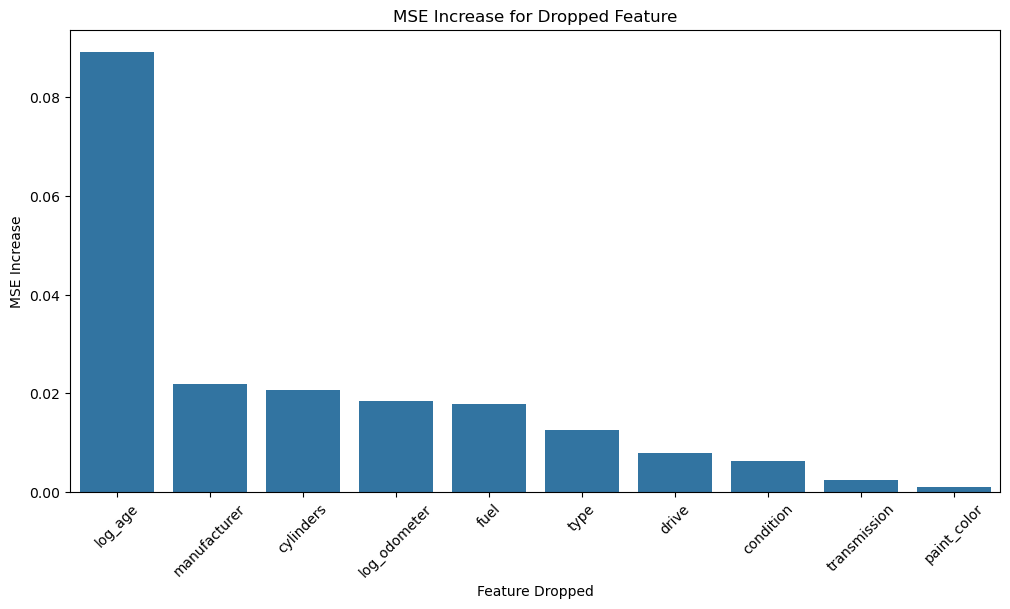

In [64]:
# Plot the MSE increase on the development set for each dropped feature or feature set
plt.figure(figsize = (12, 6))
sns.barplot(sMseDevIncrease)
plt.title("MSE Increase for Dropped Feature")
plt.xlabel("Feature Dropped")
plt.ylabel("MSE Increase")
plt.xticks(rotation = 45)
plt.show()

Paint color appears to contribute very little predictive value, so I'll use the model without that feature (with 13 encoded fields) going forward. I'll keep the remaining 9 features (or encoded feature sets), even transmission, because they all do appear to contribute something of value, and it won't hurt to keep them, given that we aren't overfitting the data.

Having settled on a final model for prediction, we are now finished with the Modeling phase of the project.

## 5. Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The final step in our analysis will be to look at the relative sizes of the coefficients of our best linear regression model, to infer the impact of various vehicle attributes on the sale price. We'll use this data, together with the overall impact of losing each feature shown above, to draw the conclusions that we will present to the customer.

First let's sort the coefficients by descending absolute value and take a look:

In [65]:
# Create a DataFrame with the features and coefficients of the best model
dfCoefficients = pd.DataFrame({
    'Feature'    : X_train_drop_pain.columns,
    'Coefficient': model_drop_pain.coef_
})

# Add a column for the absolute value of the coefficient and sort by it
dfCoefficients['AbsCoefficient'] = abs(dfCoefficients['Coefficient'])
dfCoefficients = dfCoefficients.sort_values('AbsCoefficient', ascending = False)

# Print all the coefficients to five decimal places
pd.set_option('display.float_format', '{:.5f}'.format)
with pd.option_context('display.max_rows', None):
    print(dfCoefficients[['Feature', 'Coefficient']])
pd.reset_option('display.float_format')

                         Feature  Coefficient
2                        log_age     -0.47776
3                   log_odometer     -0.21294
1                      cylinders      0.20831
45                   fuel_diesel      0.10310
67                    type_truck      0.09605
0                      condition      0.08548
54                     drive_fwd     -0.07843
66                    type_sedan     -0.07109
47                      fuel_gas     -0.06537
53                     drive_4wd      0.05724
26            manufacturer_lexus      0.05516
41           manufacturer_toyota      0.04944
7              manufacturer_audi      0.04615
55                     drive_rwd      0.04536
65                   type_pickup      0.04299
29    manufacturer_mercedes-benz      0.04112
33           manufacturer_nissan     -0.03909
13            manufacturer_dodge     -0.03691
52            transmission_other      0.03674
62                 type_mini-van     -0.03448
35          manufacturer_porsche  

This is a little hard to interpret, so let's look at a plot of the coefficients:

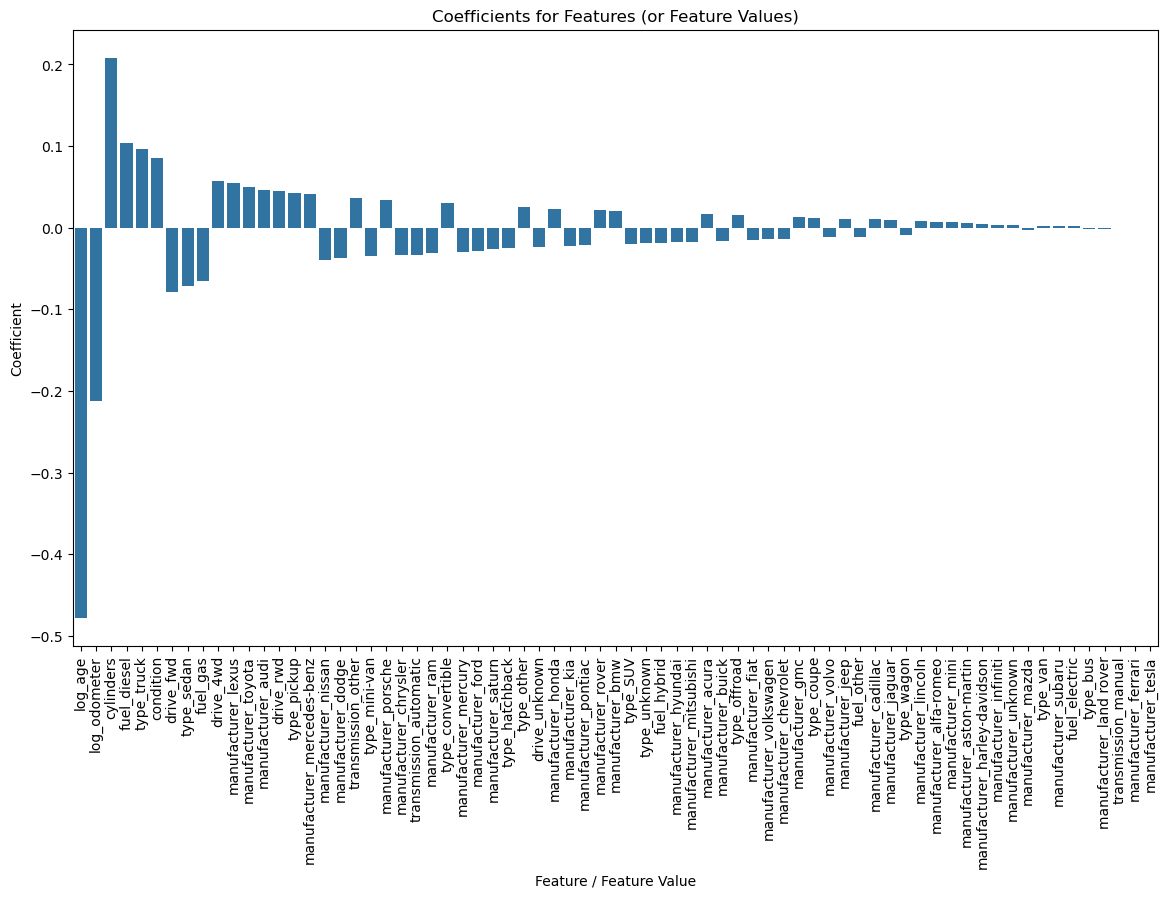

In [66]:
# Plot the coefficients for each feature (or feature value, for the encoded features)
plt.figure(figsize = (14, 8))
sns.barplot(x = dfCoefficients['Feature'], y = dfCoefficients['Coefficient'])
plt.title("Coefficients for Features (or Feature Values)")
plt.xlabel("Feature / Feature Value")
plt.ylabel("Coefficient")
plt.xticks(rotation = 90)
plt.show()

This is still a little too crowded, so let's take a look at each of the nine features separately. We'll begin with the numerical fields, and then analyze the encoded fields. I'll keep the written analysis to a minimum here, and save it for the final report (in the Deployment phase).

### 5.1 Age (Model Year)
The coefficients as well as the reverse feature selection show that by far the most important factor influencing sale price is the age of the vehicle, with the large negative coefficient on log_age showing that as the age increases (model year decreases), the price goes down, as expected.

### 5.2 Odometer Reading
The next most important single field is odometer (although taken as a whole, the manufacturer fields have a little more influence on the sale price). The negative coefficient on log_odometer shows that as the odometer reading increases, the price goes down, also as expected.

### 5.3 Cylinders
The coefficient for the ordinal field 'cylinders' is the third largest in absolute value, and positive, showing that the size of the engine has an important impact on the vehicle value, with larger engines resulting in higher vehicle prices.

### 5.4 Condition
Somewhat surprisingly, the coefficient for the ordinal field 'condition' is not as large as some of the others, and the negative impact of removing this feature is less than all the others except 'transmission' (and 'paint_color', which we are no longer considering). The positive value shows that as condition improves, the sale price goes up, but this doesn't appear to be as important a factor as some of the others, like age, odometer, and engine size.

### 5.5 Manufacturer
Here are the coefficients for each of the coded values for 'manufacturer', which the reverse feature selection showed to have a significant impact on sale price:

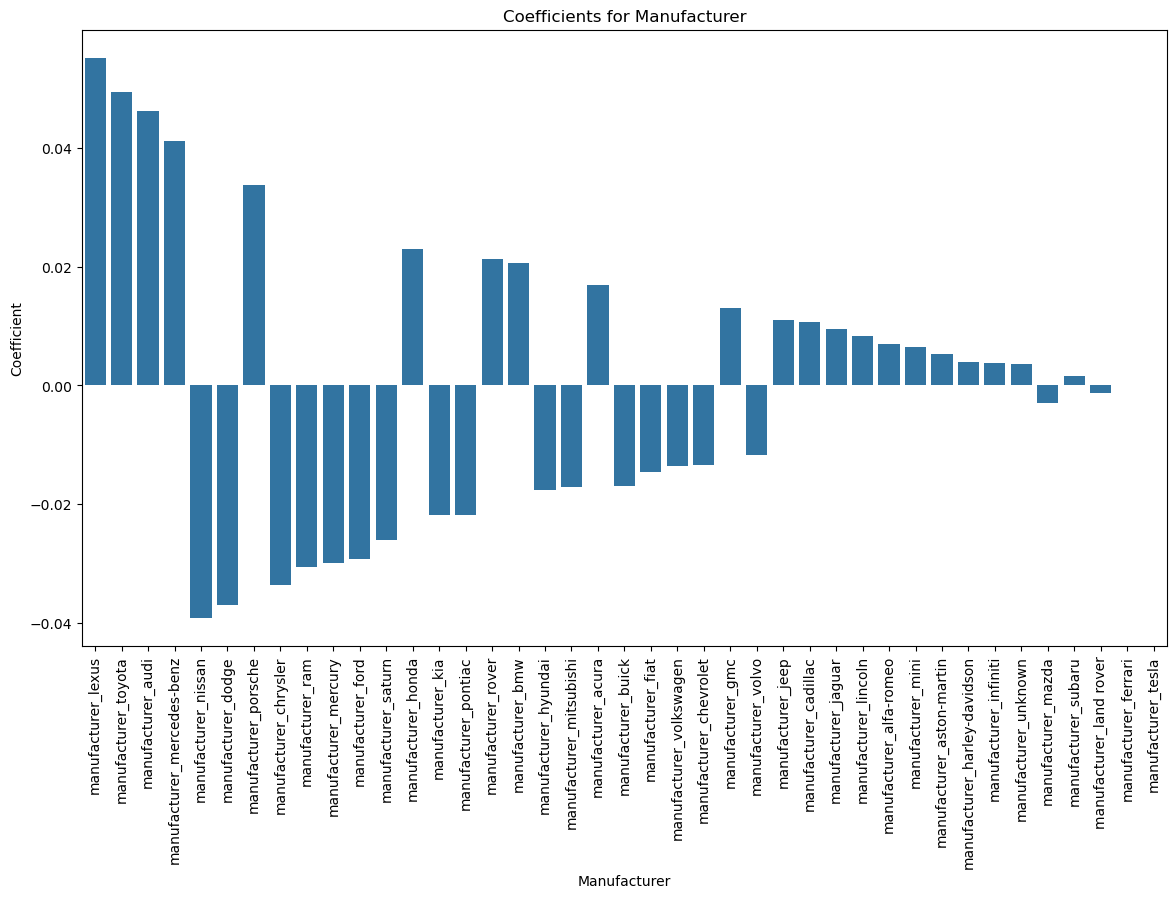

In [67]:
# Create a DataFrame with only the encoded features for 'manufacturer'
dfCoefficientsManufacturer = dfCoefficients[dfCoefficients['Feature'].str.startswith('manufacturer_')]

# Plot the coefficients
plt.figure(figsize = (14, 8))
sns.barplot(x = dfCoefficientsManufacturer['Feature'], y = dfCoefficientsManufacturer['Coefficient'])
plt.title("Coefficients for Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Coefficient")
plt.xticks(rotation = 90)
plt.show()

This plot shows which manufacturers increase or decrease the value of a car, and by how much. With this and the remaining features, I'll save the detailed analysis for the final report.

### 5.6 Fuel
Here are the coefficients for each of the coded values for 'fuel', which the reverse feature selection also showed to have a relatively large impact on sale price:

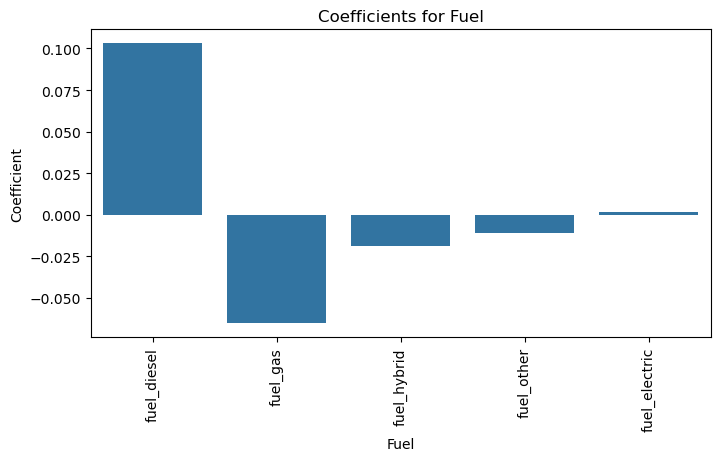

In [68]:
# Create a DataFrame with only the encoded features for 'fuel'
dfCoefficientsFuel = dfCoefficients[dfCoefficients['Feature'].str.startswith('fuel_')]

# Plot the coefficients
plt.figure(figsize = (8,4))
sns.barplot(x = dfCoefficientsFuel['Feature'], y = dfCoefficientsFuel['Coefficient'])
plt.title("Coefficients for Fuel")
plt.xlabel("Fuel")
plt.ylabel("Coefficient")
plt.xticks(rotation = 90)
plt.show()

### 5.7 Type
Here are the coefficients for each of the coded values for 'type'. This field has less of an impact, but still contributes some value to the model.

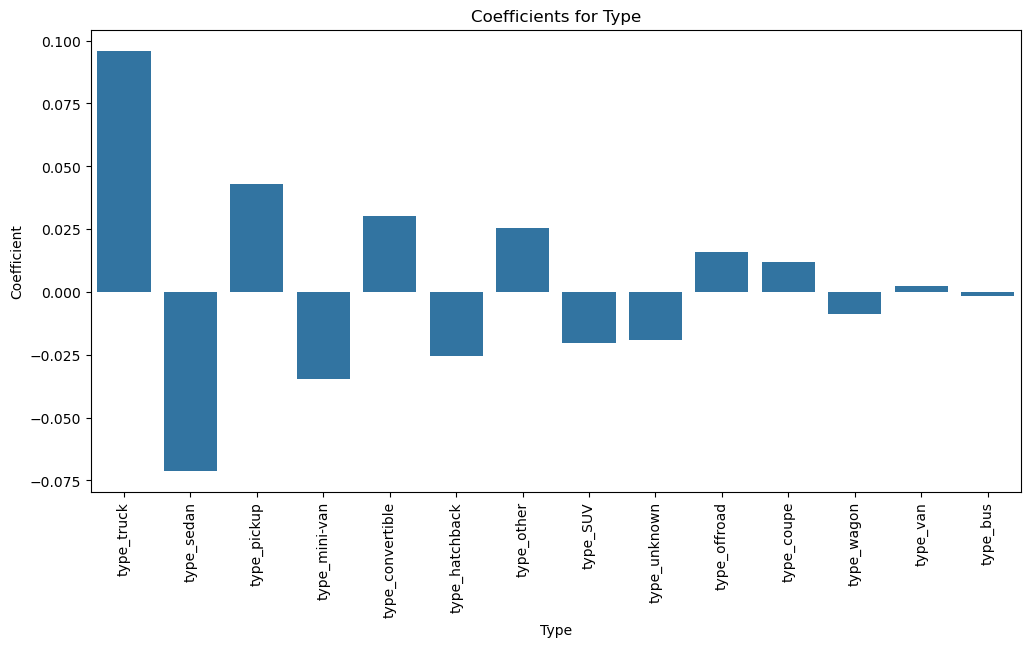

In [69]:
# Create a DataFrame with only the encoded features for 'type'
dfCoefficientsType = dfCoefficients[dfCoefficients['Feature'].str.startswith('type_')]

# Plot the coefficients
plt.figure(figsize = (12, 6))
sns.barplot(x = dfCoefficientsType['Feature'], y = dfCoefficientsType['Coefficient'])
plt.title("Coefficients for Type")
plt.xlabel("Type")
plt.ylabel("Coefficient")
plt.xticks(rotation = 90)
plt.show()

### 5.8 Drive
Here are the coefficients for each of the coded values for 'drive'. This field still contributes a little to the model.

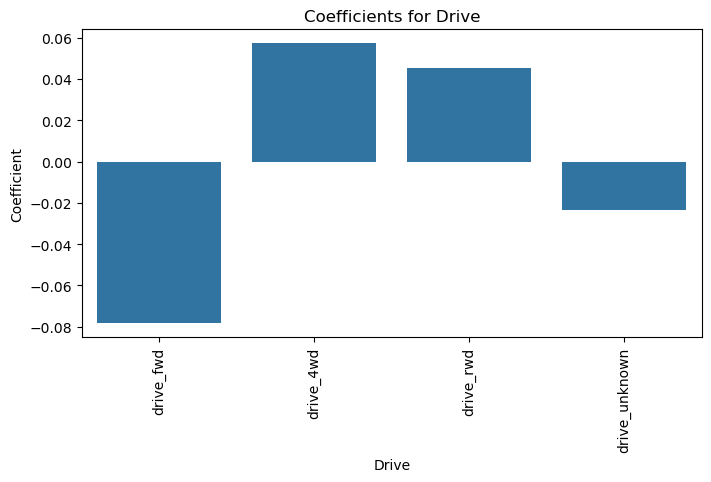

In [70]:
# Create a DataFrame with only the encoded features for 'drive'
dfCoefficientsDrive = dfCoefficients[dfCoefficients['Feature'].str.startswith('drive_')]

# Plot the coefficients
plt.figure(figsize = (8, 4))
sns.barplot(x = dfCoefficientsDrive['Feature'], y = dfCoefficientsDrive['Coefficient'])
plt.title("Coefficients for Drive")
plt.xlabel("Drive")
plt.ylabel("Coefficient")
plt.xticks(rotation = 90)
plt.show()

### 5.9 Transmission
Finally, here are the coefficients for each of the coded values for 'transmission'. This fields contributes the least, but it's still worth noting the results:

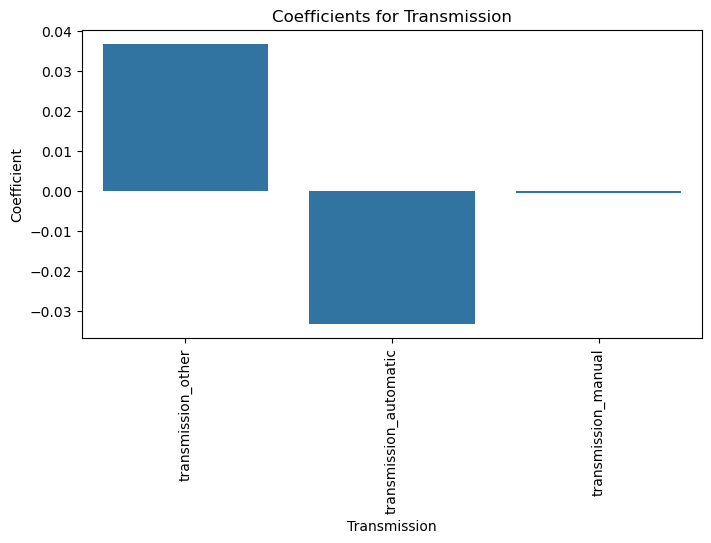

In [71]:
# Create a DataFrame with only the encoded features for 'transmission'
dfCoefficientsTransmission = dfCoefficients[dfCoefficients['Feature'].str.startswith('transmission_')]

# Plot the coefficients
plt.figure(figsize = (8, 4))
sns.barplot(x = dfCoefficientsTransmission['Feature'], y = dfCoefficientsTransmission['Coefficient'])
plt.title("Coefficients for Transmission")
plt.xlabel("Transmission")
plt.ylabel("Coefficient")
plt.xticks(rotation = 90)
plt.show()

### 5.10 Paint Color
Finally, it's worth noting that we previously determined that paint color contributes very little to the sale price of the vehicles.

## 6. Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Here is my final report:

# Report: Factors Important to Used Car Buyers

### Introduction
This report summarizes the findings of an investigation I performed into which vehicle attributes contribute positively or negatively to the sale price of used vehicles, in order to provide recommendations to used car dealers regarding what consumers value in a used car.
### Method
In order to conduct this investigation, I began with a dataset containing information about the attributes of 426,880 used cars, as well as their sale prices. After selecting only the most relevant data out of this dataset, I used machine learning techniques to develop a model that could predict the sale price from the given attributes. I then used this model to infer which of the vehicle attributes had the greatest effects on the sale price, and whether those effects were positive or negative.
### Limitations
Due to limitations of the data and the modeling process, I wasn't able to make inferences from the model about which vehicle attributes are important for:
- Vehicles that have a high price for a used car (i.e. above $57,000)
- Vehicles that are 20 or more years old
- Vehicles that don't have a clean title

I was also not able to determine:
- Which particular vehicle models are preferred or not preferred by customers (although I was able to determine preferred manufacturers)
- Which geographical regions or states command higher or lower prices for used vehicles
### Results
Subject to the limitations described above, here are my findings regarding the factors that are important to used car buyers:
##### Vehicle Age
By far the most important factor determining how much a buyer will pay for a used car is the age of the vehicle. Obviously, the newer the vehicle, the more the consumer will be willing to pay.
##### Odometer Reading
Like vehicle age, the number of miles on the vehicle has a major impact on what a customer will pay, with customers obviously preferring vehicles with lower odometer readings.
##### Engine Cyclinders
The size of the engine, measured simply as the number of cylinders, is another important factor to consumers, with larger engines being preferred.
##### Vehicle Condition
While the vehicle condition is important to consumers, a surprising result of this study is that the impact of condition on sale price was not as large as that of some of the other vehicle attributes.
##### Manufacturer
The study found that the vehicle manufacturer contributes significantly to what a buyer will be willing to pay.

The 10 most preferred manufacturers, starting from the best, are as follows:
- Lexus
- Toyota
- Audi
- Mercedes-Benz
- Porsche
- Honda
- Rover
- BMW
- Acura
- GMC

The 10 least preferred manufacturers, starting from the worst, are as follows:
- Nissan
- Dodge
- Chrysler
- Ram
- Mercury
- Ford
- Saturn
- Kia
- Pontiac
- Hyundai

##### Fuel Type
The type of fuel used by vehicles is another factor that is important to consumers, with buyers willing to pay more for vehicles that run on diesel than for gas-powered cars. Hybrid and electric cars are valued somewhere in the middle.

##### Type of Vehicle
Certain vehicle types are definitely preferred by customers over others.

Customers are willing to pay more for:
- Trucks, including pickups
- Convertibles
- Off-road vehicles
- Coupes

They will pay less for:
- Sedans
- Mini-Vans
- Hatchbacks
- SUVs
- Wagons

##### Drive Type
The vehicle drive type does contribute to the perceived value of a used car, although less so than the factors above. The study found that consumers are willing to pay more for 4-wheel-drive and rear-wheel-drive vehicles than they are for front-wheel-drive vehicles.

##### Transmission
The transmission type is less of a factor that consumers care about, although there is evidence that buyers pay more for manual transmissions than automatic transmissions, and even more for specialized transmissions that don't fall into either of those categories.

##### Paint Color
The study found that the paint color of vehicles contributes almost nothing to the eventual sale price.

### Recommendations
Based on these results, I recommend that when deciding which vehicles to acquire for sale, dealerships should focus most on obtaining vehicles that:
- Are newer and have been driven fewer miles
- Have larger engines
- Are made by one of the manufacturers on the preferred list above

Other factors to consider would be to favor, in decreasing order of importance:
- Diesel or hybrid/electric vehicles over gas-powered vehicles
- Trucks (including pickups), convertibles, and off-road vehicles over sedans, mini-vans, hatchbacks, and SUVs
- 4-wheel or rear-wheel drive vehicles over front-wheel drive vehicles
- Vehicles in better condition over those in worse condition
- Specialized or manual transmissions over automatic transmissions

Very little emphasis should be put on:
- Paint color